In [1]:
import os
import glob
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

## Descargar y descomprimir datos

In [2]:
# https://drive.google.com/file/d/1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__/view?usp=sharing
file_id = "1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__"
zip_path = "data-classification.zip"

!wget -O {zip_path} "https://drive.google.com/uc?export=download&id={file_id}"



--2025-12-03 20:28:38--  https://drive.google.com/uc?export=download&id=1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__
Resolving drive.google.com (drive.google.com)... 172.217.194.102, 172.217.194.138, 172.217.194.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__&export=download [following]
--2025-12-03 20:28:39--  https://drive.usercontent.google.com/download?id=1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.118.132, 2404:6800:4003:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.118.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428020 (2.3M) [application/octet-stream]
Saving to: ‘data-classification.zip’

data-classification 100%[===================>]   

In [3]:
import os

# Crear carpeta data
os.makedirs("data", exist_ok=True)

# --- Diagnosis: Check file type ---
print(f"Checking file type for: {zip_path}")
!file {zip_path}
# ----------------------------------

# Install unrar-free to handle RAR files
!apt-get install unrar-free

# Extraer el archivo RAR al directorio correcto
!unrar x {zip_path} data

Checking file type for: data-classification.zip
data-classification.zip: RAR archive data, v5
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  pike8.0
The following NEW packages will be installed:
  unrar-free
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 23.6 kB of archives.
After this operation, 72.7 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 unrar-free amd64 1:0.0.2-0.1 [23.6 kB]
Fetched 23.6 kB in 1s (33.5 kB/s)
Selecting previously unselected package unrar-free.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../unrar-free_1%3a0.0.2-0.1_amd64.deb ...
Unpacking unrar-free (1:0.0.2-0.1) ...
Setting up unrar-free (1:0.0.2-0.1) ...
Processing triggers for man-db (2.10.2-1) ...

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from data-classificat

## Explorar datos

Número  de imagenes por clase

In [4]:
apple_paths = glob.glob("data/apples/*.jpeg")
tomato_paths = glob.glob("data/tomatoes/*.jpeg")

print("Total apples:", len(apple_paths))
print("Total tomatoes:", len(tomato_paths))

Total apples: 218
Total tomatoes: 173


In [5]:
# DataFrame
df = pd.DataFrame({
    "filepath": apple_paths + tomato_paths,
    "label": ["apple"] * len(apple_paths) + ["tomato"] * len(tomato_paths)
})
print("\nDataset creado:")
print(df.head())


Dataset creado:
                      filepath  label
0  data/apples/img_p2_112.jpeg  apple
1   data/apples/img_p2_90.jpeg  apple
2    data/apples/img_p1_8.jpeg  apple
3   data/apples/img_p3_52.jpeg  apple
4   data/apples/img_p3_88.jpeg  apple


Tamaño de las imagenes

In [6]:
def get_img_size(path):
    try:
        with Image.open(path) as img:
            return img.size  # (width, height)
    except:
        return None

df["size"] = df["filepath"].apply(get_img_size)
print("\nTamaños de imágenes (ejemplos):")
print(df["size"].value_counts().head())


Tamaños de imágenes (ejemplos):
size
(100, 100)    98
(225, 225)    88
(275, 183)    23
(159, 159)    16
(259, 194)    16
Name: count, dtype: int64


In [ ]:
# Aplicar la función
df["size"] = df["filepath"].apply(get_img_size)

# Filtrar las filas válidas
sizes = df["size"].dropna()

# Calcular ancho y alto promedio
avg_width = sizes.apply(lambda x: x[0]).mean()
avg_height = sizes.apply(lambda x: x[1]).mean()

print(f"Tamaño medio de las imágenes: {avg_width:.1f} x {avg_height:.1f} px")


Ver Imagenes

In [7]:
def show_samples(df, n=3):
    sample = df.sample(n)
    plt.figure(figsize=(10,3))
    for i, row in enumerate(sample.itertuples()):
        img = Image.open(row.filepath)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(row.label)
        plt.axis("off")
    plt.show()


Mostrando ejemplos de imágenes...


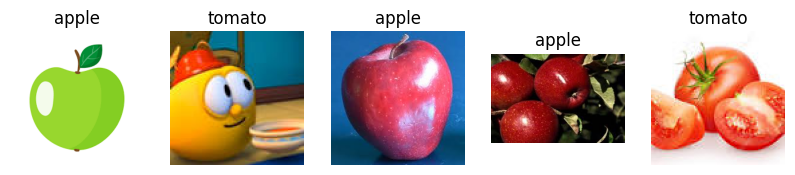

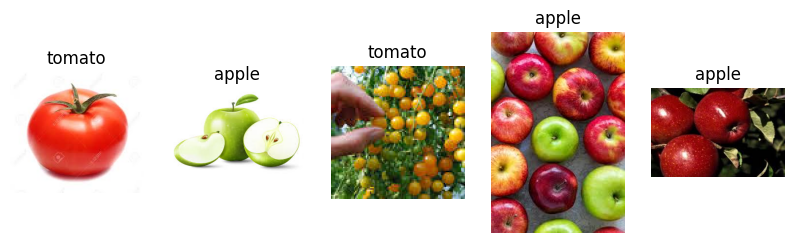

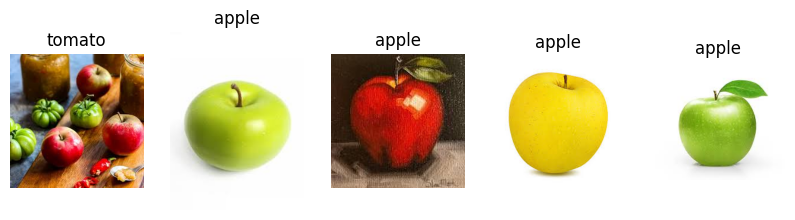

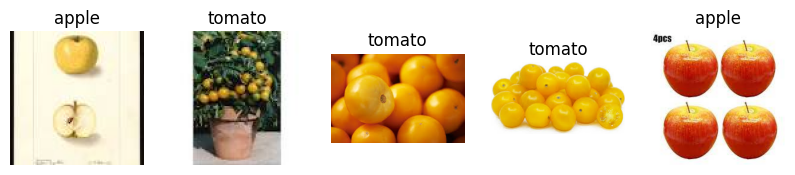

In [8]:
show_samples(df, n=5)
show_samples(df, n=5)
show_samples(df, n=5)
show_samples(df, n=5)



Distribución de las clases Train y Test

In [9]:
x = df["filepath"]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, stratify=y, random_state=42
)

print("\nNúmero de imagenes:")
print("Train:", len(x_train))
print("Test :", len(x_test))


Shapes:
Train: 312
Test : 79


In [10]:
print("\nDistribución de clases - Train:")
print(pd.Series(y_train).value_counts())

print("\nDistribución de clases - Test:")
print(pd.Series(y_test).value_counts())



Distribución de clases - Train:
label
apple     174
tomato    138
Name: count, dtype: int64

Distribución de clases - Test:
label
apple     44
tomato    35
Name: count, dtype: int64
